In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [10]:
# Get list of files
list_of_files = glob.glob('./*.csv')
files = []
# Get 4 newest files
for i in range(1):
    latest_file = max(list_of_files, key=os.path.getctime)
    files.append(latest_file)
    list_of_files.remove(latest_file)
for f in files:
    print(f)

./history_mlp_250_200-150-120_7x7_nrt_ellipse_nfp_nct_dshift1_bia_ned_ncl_s1.csv


In [11]:
data = pd.read_csv(f'history_mlp_1000_200-150-120_7x7_rot_ellipse_flp_cut_dshift1_shift1_bia_int1_edg_ncl_g_s1_neuEdge.csv')
print(list(data.columns))

['epoch', 'loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse']


./history_mlp_250_200-150-120_7x7_nrt_ellipse_nfp_nct_dshift1_bia_ned_ncl_s1.csv:	2.55E-04	2.54E-04


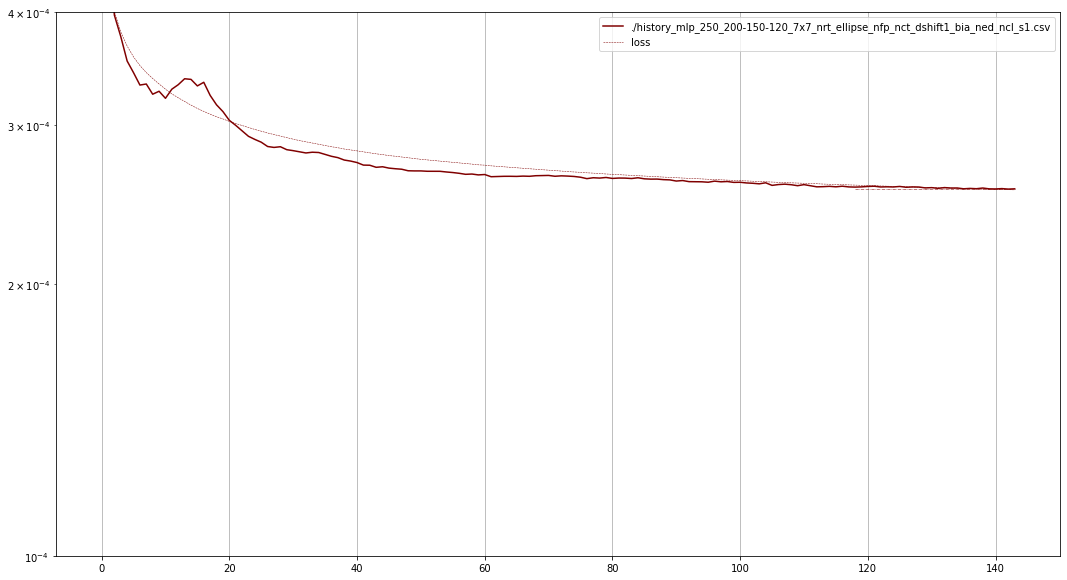

In [12]:
fig, ax = plt.subplots(figsize = (18, 10))
reds = iter(['maroon', 'green', 'steelblue', 'lightcoral', 'cyan', 'darkviolet', 'indigo', 'chocolate'])
# '''
for f in files:
    data = pd.read_csv(f)
    color = next(reds)
    data['val_loss'].plot(color=color, label=f)
    data['loss'].plot(ls='--', color=color, lw=0.5)
    lowest_value = min(data['val_loss'])
    lowest_loss = min(data['loss'])
    print(f'{f}:\t{lowest_value:.2E}\t{lowest_loss:.2E}')
    plt.plot([max(0, data['loss'].shape[0]-26), data['loss'].shape[0]-1], [lowest_value, lowest_value], color=color, ls='-.', lw=0.5)
plt.legend()
ax.set_yscale('log')
ax.set_ylim([1e-4, 4e-4])
# ax.set_xlim([0, 50])
# ax.set_ylim([1.2e-5, 2e-5])
# ax.set_ylim([0.0009, 0.0014])
plt.grid()
plt.show()